# DKASC_爱丽丝泉_光伏预测

In [1]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf
import keras
#import torch
import catboost as cb
from pandas import read_csv
from math import sqrt
from numpy import concatenate
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:472: FutureWarning: Passi

In [2]:
import os
 
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
config = tf.ConfigProto(allow_soft_placement = True)
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction = 0.5)
config.gpu_options.allow_growth = True
 
sess0 = tf.InteractiveSession(config = config)

In [3]:
print(os.getcwd()) # 打印当前工作目录

E:\graduation project\DKASC, Alice Springs


In [4]:
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 '101-Site_DKA-WeatherStation',
 '96-Site_DKA-MasterMeter1',
 'Alice_Springs.ipynb',
 'Alice_Springs_2016-2020',
 'predict']

In [5]:
os.chdir("./Alice_Springs_2016-2020/")

In [6]:
os.listdir()

['Alice_Springs_2016.csv',
 'Alice_Springs_2017.csv',
 'Alice_Springs_2018.csv',
 'Alice_Springs_2019.csv',
 'Alice_Springs_2020.csv',
 'test_1-8.csv',
 'test_1A.csv',
 'train_1-8.csv',
 'train_1A.csv']

In [7]:
#train1 = pd.read_csv('Alice_Springs_2016.csv')
#train2 = pd.read_csv('Alice_Springs_2017.csv')
train3 = pd.read_csv('Alice_Springs_2018.csv')
train4 = pd.read_csv('Alice_Springs_2019.csv')
#train4['GRP'] = 4
test = pd.read_csv('Alice_Springs_2020.csv')


In [8]:
#查看输入数据维度
#print(train1.shape)
#print(train2.shape)
print(train3.shape)
print(train4.shape)

print(test.shape)

(105229, 53)
(105321, 53)
(29700, 53)


In [9]:
#train = pd.concat([train1,train2,train3,train4],axis=0)
train = pd.concat([train3,train4],axis=0)    #连接两个训练集 并查看数据维度
print(train.shape)
train.head(10)

(210550, 53)


,Timestamp,1A Trina - Active Power (kW),1B Trina - Active Power (kW),2 eco-Kinetics - Active Power (kW),3 BP Solar - Active Power (kW),4 Kyocera - Active Power (kW),5 Kyocera - Active Power (kW),6 Kyocera - Active Power (kW),7 First Solar - Active Power (kW),8 Kaneka - Active Power (kW),...,DKA.MasterMeter2 - Active Power (kW),DKA.WeatherStation - Wind Speed (m/s),DKA.WeatherStation - Weather Temperature Celsius (°C),DKA.WeatherStation - Weather Relative Humidity (%),DKA.WeatherStation - Global Horizontal Radiation (W/m²),DKA.WeatherStation - Diffuse Horizontal Radiation (W/m²),DKA.WeatherStation - Wind Direction (Degrees),DKA.WeatherStation - Weather Daily Rainfall (mm),DKA.WeatherStation - Radiation Global Tilted (W/m²),DKA.WeatherStation - Radiation Diffuse Tilted (W/m²)
0,2018/1/1 0:00,0.0,0.0,-0.008200,0.000267,0.0,0.0,-0.02,0.000200,0.0,...,NaN,NaN,27.911371,29.940123,3.595562,2.240332,316.830688,0.0,NaN,NaN
1,2018/1/1 0:05,0.0,0.0,-0.006800,0.000200,0.0,0.0,-0.02,0.000400,0.0,...,NaN,NaN,27.666079,31.129065,3.695016,2.339242,333.421692,0.0,NaN,NaN
2,2018/1/1 0:10,0.0,0.0,-0.006433,0.000267,0.0,0.0,-0.02,0.000200,0.0,...,NaN,NaN,27.433355,31.153343,2.940332,1.543966,322.772247,0.0,NaN,NaN
3,2018/1/1 0:15,0.0,0.0,-0.007167,0.000400,0.0,0.0,-0.02,0.000067,0.0,...,NaN,NaN,27.948530,30.060120,1.683121,0.621979,331.774689,0.0,NaN,NaN
4,2018/1/1 0:20,0.0,0.0,-0.006567,0.000333,0.0,0.0,-0.02,-0.000067,0.0,...,NaN,NaN,28.748331,28.336712,1.280866,0.627035,334.676544,0.0,NaN,NaN
5,2018/1/1 0:25,0.0,0.0,-0.006867,0.000067,0.0,0.0,-0.02,0.000133,0.0,...,NaN,NaN,29.084066,27.650440,1.259595,0.632595,331.822601,0.0,NaN,NaN
6,2018/1/1 0:30,0.0,0.0,-0.009000,0.000200,0.0,0.0,-0.02,0.000267,0.0,...,NaN,NaN,29.144590,27.566601,1.401111,0.642391,336.971619,0.0,NaN,NaN
7,2018/1/1 0:35,0.0,0.0,-0.008600,0.000200,0.0,0.0,-0.02,0.000067,0.0,...,NaN,NaN,29.221727,27.482796,1.458233,0.646050,339.344757,0.0,NaN,NaN
8,2018/1/1 0:40,0.0,0.0,-0.007533,0.000267,0.0,0.0,-0.02,0.000333,0.0,...,NaN,NaN,29.229469,27.541845,1.660645,0.652419,337.869324,0.0,NaN,NaN
9,2018/1/1 0:45,0.0,0.0,-0.007367,0.000267,0.0,0.0,-0.02,0.000133,0.0,...,NaN,NaN,29.242725,27.662283,1.718909,0.651290,329.264923,0.0,NaN,NaN


# 数据预处理

训练集除空

In [10]:
print('训练集初始维度：',train.shape)
train.dropna(axis="columns", how='all', inplace=True)  #删除掉训练集全是空值的列
train.dropna(axis="index", how='all', inplace=True)   #删除掉训练集全是空值的行
print('训练集去除全空维度：',train.shape)
train

训练集初始维度： (210550, 53)
训练集去除全空维度： (210550, 51)


,Timestamp,1A Trina - Active Power (kW),1B Trina - Active Power (kW),2 eco-Kinetics - Active Power (kW),3 BP Solar - Active Power (kW),4 Kyocera - Active Power (kW),5 Kyocera - Active Power (kW),6 Kyocera - Active Power (kW),7 First Solar - Active Power (kW),8 Kaneka - Active Power (kW),...,DKA.MasterMeter1 - Active Power (kW),DKA.MasterMeter2 - Active Power (kW),DKA.WeatherStation - Weather Temperature Celsius (°C),DKA.WeatherStation - Weather Relative Humidity (%),DKA.WeatherStation - Global Horizontal Radiation (W/m²),DKA.WeatherStation - Diffuse Horizontal Radiation (W/m²),DKA.WeatherStation - Wind Direction (Degrees),DKA.WeatherStation - Weather Daily Rainfall (mm),DKA.WeatherStation - Radiation Global Tilted (W/m²),DKA.WeatherStation - Radiation Diffuse Tilted (W/m²)
0,2018/1/1 0:00,0.0,0.0,-0.008200,0.000267,0.0,0.0,-0.020000,0.000200,0.0,...,-0.474020,NaN,27.911371,29.940123,3.595562,2.240332,316.830688,0.0,NaN,NaN
1,2018/1/1 0:05,0.0,0.0,-0.006800,0.000200,0.0,0.0,-0.020000,0.000400,0.0,...,-0.473699,NaN,27.666079,31.129065,3.695016,2.339242,333.421692,0.0,NaN,NaN
2,2018/1/1 0:10,0.0,0.0,-0.006433,0.000267,0.0,0.0,-0.020000,0.000200,0.0,...,-0.474014,NaN,27.433355,31.153343,2.940332,1.543966,322.772247,0.0,NaN,NaN
3,2018/1/1 0:15,0.0,0.0,-0.007167,0.000400,0.0,0.0,-0.020000,0.000067,0.0,...,-0.474207,NaN,27.948530,30.060120,1.683121,0.621979,331.774689,0.0,NaN,NaN
4,2018/1/1 0:20,0.0,0.0,-0.006567,0.000333,0.0,0.0,-0.020000,-0.000067,0.0,...,-0.474254,NaN,28.748331,28.336712,1.280866,0.627035,334.676544,0.0,NaN,NaN
5,2018/1/1 0:25,0.0,0.0,-0.006867,0.000067,0.0,0.0,-0.020000,0.000133,0.0,...,-0.474062,NaN,29.084066,27.650440,1.259595,0.632595,331.822601,0.0,NaN,NaN
6,2018/1/1 0:30,0.0,0.0,-0.009000,0.000200,0.0,0.0,-0.020000,0.000267,0.0,...,-0.475001,NaN,29.144590,27.566601,1.401111,0.642391,336.971619,0.0,NaN,NaN
7,2018/1/1 0:35,0.0,0.0,-0.008600,0.000200,0.0,0.0,-0.020000,0.000067,0.0,...,-0.474797,NaN,29.221727,27.482796,1.458233,0.646050,339.344757,0.0,NaN,NaN
8,2018/1/1 0:40,0.0,0.0,-0.007533,0.000267,0.0,0.0,-0.020000,0.000333,0.0,...,-0.474572,NaN,29.229469,27.541845,1.660645,0.652419,337.869324,0.0,NaN,NaN
9,2018/1/1 0:45,0.0,0.0,-0.007367,0.000267,0.0,0.0,-0.020000,0.000133,0.0,...,-0.474571,NaN,29.242725,27.662283,1.718909,0.651290,329.264923,0.0,NaN,NaN


测试集除空

In [11]:
print('测试集初始空维度：',test.shape)
test.dropna(axis="columns", how='all', inplace=True)   #删除掉测试集全是空值的列
test.dropna(axis="index", how='all', inplace=True)    #删除掉测试集全是空值的行
print('测试集除去全空维度：',test.shape)
test

测试集初始空维度： (29700, 53)
测试集除去全空维度： (29700, 51)


,Timestamp,1A Trina - Active Power (kW),1B Trina - Active Power (kW),2 eco-Kinetics - Active Power (kW),3 BP Solar - Active Power (kW),4 Kyocera - Active Power (kW),5 Kyocera - Active Power (kW),6 Kyocera - Active Power (kW),7 First Solar - Active Power (kW),8 Kaneka - Active Power (kW),...,DKA.MasterMeter1 - Active Power (kW),DKA.MasterMeter2 - Active Power (kW),DKA.WeatherStation - Weather Temperature Celsius (°C),DKA.WeatherStation - Weather Relative Humidity (%),DKA.WeatherStation - Global Horizontal Radiation (W/m²),DKA.WeatherStation - Diffuse Horizontal Radiation (W/m²),DKA.WeatherStation - Wind Direction (Degrees),DKA.WeatherStation - Weather Daily Rainfall (mm),DKA.WeatherStation - Radiation Global Tilted (W/m²),DKA.WeatherStation - Radiation Diffuse Tilted (W/m²)
0,2020/1/1 0:00,0.0,0.0,0.008233,0.000533,0.0,0.0,-0.020000,-0.01,0.0,...,-0.473440,-0.113126,29.685360,21.727171,1.360221,1.191879,33.216167,0.0,2.958199,0.524153
1,2020/1/1 0:05,0.0,0.0,0.008233,0.000400,0.0,0.0,-0.019967,-0.01,0.0,...,-0.473580,-0.113157,29.559967,21.878902,1.532208,1.460944,33.254341,0.0,3.288470,0.764565
2,2020/1/1 0:10,0.0,0.0,0.007900,0.000267,0.0,0.0,-0.019900,-0.01,0.0,...,-0.473716,-0.113250,29.530006,21.859453,1.186835,1.118219,33.302616,0.0,3.253541,0.725652
3,2020/1/1 0:15,0.0,0.0,0.008433,0.000267,0.0,0.0,-0.019933,-0.01,0.0,...,-0.473666,-0.113209,29.474438,21.897285,1.017349,0.824890,33.337837,0.0,3.260514,0.706365
4,2020/1/1 0:20,0.0,0.0,0.008567,0.000267,0.0,0.0,-0.020000,-0.01,0.0,...,-0.473516,-0.113048,29.365288,22.085625,1.323369,1.175776,33.375069,0.0,3.148183,0.694154
5,2020/1/1 0:25,0.0,0.0,0.008167,0.000867,0.0,0.0,-0.019967,-0.01,0.0,...,-0.473170,-0.112705,29.223780,22.275812,1.720813,1.575351,33.423721,0.0,3.426321,0.964147
6,2020/1/1 0:30,0.0,0.0,0.007933,0.000200,0.0,0.0,-0.020000,-0.01,0.0,...,-0.473434,-0.112700,29.078783,22.451258,1.753417,1.582172,33.468391,0.0,3.611997,1.257185
7,2020/1/1 0:35,0.0,0.0,0.008033,0.000400,0.0,0.0,-0.020000,-0.01,0.0,...,-0.473161,-0.112625,28.957481,22.637762,1.742352,1.633590,33.527313,0.0,3.643157,1.188009
8,2020/1/1 0:40,0.0,0.0,0.008433,0.000333,0.0,0.0,-0.020000,-0.01,0.0,...,-0.473780,-0.112971,28.814610,22.835932,1.805557,1.631509,33.590416,0.0,3.819599,1.174781
9,2020/1/1 0:45,0.0,0.0,0.007467,0.000467,0.0,0.0,-0.020000,-0.01,0.0,...,-0.473554,-0.112911,28.729786,22.996599,1.671176,1.498169,33.636559,0.0,3.634844,0.964134


In [12]:
# 查看训练数据的形状，列名索引、数据类型
print('训练集维度:\n',train.shape)
print('\n训练集列名：\n',train.columns)
print('\n训练集索引列：\n',train.index)
print('\n训练集每列的数据类型：',train.dtypes)

训练集维度:
 (210550, 51)

训练集列名：
 Index(['Timestamp', '1A Trina - Active Power (kW)',
       '1B Trina - Active Power (kW)', '2 eco-Kinetics - Active Power (kW)',
       '3 BP Solar - Active Power (kW)', '4 Kyocera - Active Power (kW)',
       '5 Kyocera - Active Power (kW)', '6 Kyocera - Active Power (kW)',
       '7 First Solar - Active Power (kW)', '8 Kaneka - Active Power (kW)',
       '10 SunPower - Active Power (kW)', '11 BP Solar - Active Power (kW)',
       '12 BP Solar - Active Power (kW)', '13 Trina - Active Power (kW)',
       '14 Kyocera - Active Power (kW)', '16A BP Solar - Active Power (kW)',
       '16B BP Solar - Active Power (kW)', '16C BP Solar - Active Power (kW)',
       '16D BP Solar - Active Power (kW)', '17 Sanyo - Active Power (kW)',
       '18 SunPower - Active Power (kW)', '19 Sungrid - Active Power (kW)',
       '20 Sungrid - Active Power (kW)',
       '21 Evergreen Solar - Active Power (kW)',
       '22 SolFocus - Active Power (kW)', '23 Calyxo - Active Power (k

In [13]:
# 查看测试数据的形状，列名索引、数据类型
print('测试集维度:\n',test.shape)
print('\n测试集列名：\n',test.columns)
print('\n测试集索引列：\n',test.index)
print('\n测试集每列的数据类型：',test.dtypes)

测试集维度:
 (29700, 51)

测试集列名：
 Index(['Timestamp', '1A Trina - Active Power (kW)',
       '1B Trina - Active Power (kW)', '2 eco-Kinetics - Active Power (kW)',
       '3 BP Solar - Active Power (kW)', '4 Kyocera - Active Power (kW)',
       '5 Kyocera - Active Power (kW)', '6 Kyocera - Active Power (kW)',
       '7 First Solar - Active Power (kW)', '8 Kaneka - Active Power (kW)',
       '10 SunPower - Active Power (kW)', '11 BP Solar - Active Power (kW)',
       '12 BP Solar - Active Power (kW)', '13 Trina - Active Power (kW)',
       '14 Kyocera - Active Power (kW)', '16A BP Solar - Active Power (kW)',
       '16B BP Solar - Active Power (kW)', '16C BP Solar - Active Power (kW)',
       '16D BP Solar - Active Power (kW)', '17 Sanyo - Active Power (kW)',
       '18 SunPower - Active Power (kW)', '19 Sungrid - Active Power (kW)',
       '20 Sungrid - Active Power (kW)',
       '21 Evergreen Solar - Active Power (kW)',
       '22 SolFocus - Active Power (kW)', '23 Calyxo - Active Power (kW

选取8个站点训练集和测试集

In [14]:
train = train[['Timestamp',
       'DKA.WeatherStation - Weather Temperature Celsius (°C)',
       'DKA.WeatherStation - Weather Relative Humidity (%)',
       'DKA.WeatherStation - Global Horizontal Radiation (W/m²)',
       'DKA.WeatherStation - Diffuse Horizontal Radiation (W/m²)',
       'DKA.WeatherStation - Wind Direction (Degrees)',
       'DKA.WeatherStation - Weather Daily Rainfall (mm)',
       'DKA.WeatherStation - Radiation Global Tilted (W/m²)',
       'DKA.WeatherStation - Radiation Diffuse Tilted (W/m²)',
       '1A Trina - Active Power (kW)',
       '1B Trina - Active Power (kW)', '2 eco-Kinetics - Active Power (kW)',
       '3 BP Solar - Active Power (kW)', '4 Kyocera - Active Power (kW)',
       '5 Kyocera - Active Power (kW)', '6 Kyocera - Active Power (kW)',
       '7 First Solar - Active Power (kW)', '8 Kaneka - Active Power (kW)',
       'DKA.MasterMeter1 - Active Power (kW)',
       'DKA.MasterMeter2 - Active Power (kW)']]

In [15]:
train.head()

,Timestamp,DKA.WeatherStation - Weather Temperature Celsius (°C),DKA.WeatherStation - Weather Relative Humidity (%),DKA.WeatherStation - Global Horizontal Radiation (W/m²),DKA.WeatherStation - Diffuse Horizontal Radiation (W/m²),DKA.WeatherStation - Wind Direction (Degrees),DKA.WeatherStation - Weather Daily Rainfall (mm),DKA.WeatherStation - Radiation Global Tilted (W/m²),DKA.WeatherStation - Radiation Diffuse Tilted (W/m²),1A Trina - Active Power (kW),1B Trina - Active Power (kW),2 eco-Kinetics - Active Power (kW),3 BP Solar - Active Power (kW),4 Kyocera - Active Power (kW),5 Kyocera - Active Power (kW),6 Kyocera - Active Power (kW),7 First Solar - Active Power (kW),8 Kaneka - Active Power (kW),DKA.MasterMeter1 - Active Power (kW),DKA.MasterMeter2 - Active Power (kW)
0,2018/1/1 0:00,27.911371,29.940123,3.595562,2.240332,316.830688,0.0,NaN,NaN,0.0,0.0,-0.008200,0.000267,0.0,0.0,-0.02,0.000200,0.0,-0.474020,NaN
1,2018/1/1 0:05,27.666079,31.129065,3.695016,2.339242,333.421692,0.0,NaN,NaN,0.0,0.0,-0.006800,0.000200,0.0,0.0,-0.02,0.000400,0.0,-0.473699,NaN
2,2018/1/1 0:10,27.433355,31.153343,2.940332,1.543966,322.772247,0.0,NaN,NaN,0.0,0.0,-0.006433,0.000267,0.0,0.0,-0.02,0.000200,0.0,-0.474014,NaN
3,2018/1/1 0:15,27.948530,30.060120,1.683121,0.621979,331.774689,0.0,NaN,NaN,0.0,0.0,-0.007167,0.000400,0.0,0.0,-0.02,0.000067,0.0,-0.474207,NaN
4,2018/1/1 0:20,28.748331,28.336712,1.280866,0.627035,334.676544,0.0,NaN,NaN,0.0,0.0,-0.006567,0.000333,0.0,0.0,-0.02,-0.000067,0.0,-0.474254,NaN


In [16]:
#电站和气象数据重命名
train.rename(columns={
       'DKA.WeatherStation - Weather Temperature Celsius (°C)':'WTC',
       'DKA.WeatherStation - Weather Relative Humidity (%)':'WRH',
       'DKA.WeatherStation - Global Horizontal Radiation (W/m²)':'GHR',
       'DKA.WeatherStation - Diffuse Horizontal Radiation (W/m²)':'DHR',
       'DKA.WeatherStation - Wind Direction (Degrees)':'WD',
       'DKA.WeatherStation - Weather Daily Rainfall (mm)':'WDR',
       'DKA.WeatherStation - Radiation Global Tilted (W/m²)':'RGT',
       'DKA.WeatherStation - Radiation Diffuse Tilted (W/m²)':'RDT',
       '1A Trina - Active Power (kW)':'1A Trina_power',
       '1B Trina - Active Power (kW)':'1B Trina_power',
       '2 eco-Kinetics - Active Power (kW)':'2 eco_power',
       '3 BP Solar - Active Power (kW)':'3 BP_power',
       '4 Kyocera - Active Power (kW)':'4 Kyocera_power',
       '5 Kyocera - Active Power (kW)':'5 Kyocera_power',
       '6 Kyocera - Active Power (kW)':'6 Kyocera_power',
       '7 First Solar - Active Power (kW)':'7 First_power',
       '8 Kaneka - Active Power (kW)':'8 Kaneka_power',
       'DKA.MasterMeter1 - Active Power (kW)':'DKA.Meter1_power',
       'DKA.MasterMeter2 - Active Power (kW)':'DKA.Meter2_power'},inplace=True)
strsplit = train.Timestamp.str.split(expand = True)
strsplit.rename(columns={0:'date',1:'time'},inplace=True)
date = strsplit.date.str.split(expand = True,pat='/')
date.rename(columns={0:'Year',1:'Month',2:'Day'},inplace=True)
time = strsplit.time.str.split(expand = True,pat=':')
#time.rename(columns = {0:'H',1:'M',2:'S'},inplace = True)
time.rename(columns = {0:'Hour',1:'Minutes'},inplace = True)
train = pd.concat([train,date,time],axis=1)
train.to_csv('./train_1-8.csv',index=False)
train.head()


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4015: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Timestamp,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power,...,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power,Year,Month,Day,Hour,Minutes
0,2018/1/1 0:00,27.911371,29.940123,3.595562,2.240332,316.830688,0.0,NaN,NaN,0.0,...,-0.02,0.000200,0.0,-0.474020,NaN,2018,1,1,0,00
1,2018/1/1 0:05,27.666079,31.129065,3.695016,2.339242,333.421692,0.0,NaN,NaN,0.0,...,-0.02,0.000400,0.0,-0.473699,NaN,2018,1,1,0,05
2,2018/1/1 0:10,27.433355,31.153343,2.940332,1.543966,322.772247,0.0,NaN,NaN,0.0,...,-0.02,0.000200,0.0,-0.474014,NaN,2018,1,1,0,10
3,2018/1/1 0:15,27.948530,30.060120,1.683121,0.621979,331.774689,0.0,NaN,NaN,0.0,...,-0.02,0.000067,0.0,-0.474207,NaN,2018,1,1,0,15
4,2018/1/1 0:20,28.748331,28.336712,1.280866,0.627035,334.676544,0.0,NaN,NaN,0.0,...,-0.02,-0.000067,0.0,-0.474254,NaN,2018,1,1,0,20


In [17]:
test = test[['Timestamp', 
       'DKA.WeatherStation - Weather Temperature Celsius (°C)',
       'DKA.WeatherStation - Weather Relative Humidity (%)',
       'DKA.WeatherStation - Global Horizontal Radiation (W/m²)',
       'DKA.WeatherStation - Diffuse Horizontal Radiation (W/m²)',
       'DKA.WeatherStation - Wind Direction (Degrees)',
       'DKA.WeatherStation - Weather Daily Rainfall (mm)',
       'DKA.WeatherStation - Radiation Global Tilted (W/m²)',
       'DKA.WeatherStation - Radiation Diffuse Tilted (W/m²)',
       '1A Trina - Active Power (kW)',
       '1B Trina - Active Power (kW)',
       '2 eco-Kinetics - Active Power (kW)',
       '3 BP Solar - Active Power (kW)',
       '4 Kyocera - Active Power (kW)',
       '5 Kyocera - Active Power (kW)', 
       '6 Kyocera - Active Power (kW)',
       '7 First Solar - Active Power (kW)', 
       '8 Kaneka - Active Power (kW)',
       'DKA.MasterMeter1 - Active Power (kW)',
       'DKA.MasterMeter2 - Active Power (kW)']]

In [18]:
test.head()

,Timestamp,DKA.WeatherStation - Weather Temperature Celsius (°C),DKA.WeatherStation - Weather Relative Humidity (%),DKA.WeatherStation - Global Horizontal Radiation (W/m²),DKA.WeatherStation - Diffuse Horizontal Radiation (W/m²),DKA.WeatherStation - Wind Direction (Degrees),DKA.WeatherStation - Weather Daily Rainfall (mm),DKA.WeatherStation - Radiation Global Tilted (W/m²),DKA.WeatherStation - Radiation Diffuse Tilted (W/m²),1A Trina - Active Power (kW),1B Trina - Active Power (kW),2 eco-Kinetics - Active Power (kW),3 BP Solar - Active Power (kW),4 Kyocera - Active Power (kW),5 Kyocera - Active Power (kW),6 Kyocera - Active Power (kW),7 First Solar - Active Power (kW),8 Kaneka - Active Power (kW),DKA.MasterMeter1 - Active Power (kW),DKA.MasterMeter2 - Active Power (kW)
0,2020/1/1 0:00,29.685360,21.727171,1.360221,1.191879,33.216167,0.0,2.958199,0.524153,0.0,0.0,0.008233,0.000533,0.0,0.0,-0.020000,-0.01,0.0,-0.473440,-0.113126
1,2020/1/1 0:05,29.559967,21.878902,1.532208,1.460944,33.254341,0.0,3.288470,0.764565,0.0,0.0,0.008233,0.000400,0.0,0.0,-0.019967,-0.01,0.0,-0.473580,-0.113157
2,2020/1/1 0:10,29.530006,21.859453,1.186835,1.118219,33.302616,0.0,3.253541,0.725652,0.0,0.0,0.007900,0.000267,0.0,0.0,-0.019900,-0.01,0.0,-0.473716,-0.113250
3,2020/1/1 0:15,29.474438,21.897285,1.017349,0.824890,33.337837,0.0,3.260514,0.706365,0.0,0.0,0.008433,0.000267,0.0,0.0,-0.019933,-0.01,0.0,-0.473666,-0.113209
4,2020/1/1 0:20,29.365288,22.085625,1.323369,1.175776,33.375069,0.0,3.148183,0.694154,0.0,0.0,0.008567,0.000267,0.0,0.0,-0.020000,-0.01,0.0,-0.473516,-0.113048


In [19]:
test.rename(columns={
       'DKA.WeatherStation - Weather Temperature Celsius (°C)':'WTC',
       'DKA.WeatherStation - Weather Relative Humidity (%)':'WRH',
       'DKA.WeatherStation - Global Horizontal Radiation (W/m²)':'GHR',
       'DKA.WeatherStation - Diffuse Horizontal Radiation (W/m²)':'DHR',
       'DKA.WeatherStation - Wind Direction (Degrees)':'WD',
       'DKA.WeatherStation - Weather Daily Rainfall (mm)':'WDR',
       'DKA.WeatherStation - Radiation Global Tilted (W/m²)':'RGT',
       'DKA.WeatherStation - Radiation Diffuse Tilted (W/m²)':'RDT',
       '1A Trina - Active Power (kW)':'1A Trina_power',
       '1B Trina - Active Power (kW)':'1B Trina_power',
       '2 eco-Kinetics - Active Power (kW)':'2 eco_power',
       '3 BP Solar - Active Power (kW)':'3 BP_power',
       '4 Kyocera - Active Power (kW)':'4 Kyocera_power',
       '5 Kyocera - Active Power (kW)':'5 Kyocera_power',
       '6 Kyocera - Active Power (kW)':'6 Kyocera_power',
       '7 First Solar - Active Power (kW)':'7 First_power',
       '8 Kaneka - Active Power (kW)':'8 Kaneka_power',
       'DKA.MasterMeter1 - Active Power (kW)':'DKA.Meter1_power',
       'DKA.MasterMeter2 - Active Power (kW)':'DKA.Meter2_power',},inplace=True)
strsplit = test.Timestamp.str.split(expand = True)
strsplit.rename(columns={0:'date',1:'time'},inplace=True)
date = strsplit.date.str.split(expand = True,pat='/')
date.rename(columns={0:'Year',1:'Month',2:'Day'},inplace=True)
time = strsplit.time.str.split(expand = True,pat=':')
#time.rename(columns = {0:'H',1:'M',2:'S'},inplace = True)
time.rename(columns = {0:'Hour',1:'Minutes'},inplace = True)
test = pd.concat([test,date,time],axis=1)
test.to_csv('./test_1-8.csv',index=False)
test.head()


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4015: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Timestamp,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power,...,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power,Year,Month,Day,Hour,Minutes
0,2020/1/1 0:00,29.685360,21.727171,1.360221,1.191879,33.216167,0.0,2.958199,0.524153,0.0,...,-0.020000,-0.01,0.0,-0.473440,-0.113126,2020,1,1,0,00
1,2020/1/1 0:05,29.559967,21.878902,1.532208,1.460944,33.254341,0.0,3.288470,0.764565,0.0,...,-0.019967,-0.01,0.0,-0.473580,-0.113157,2020,1,1,0,05
2,2020/1/1 0:10,29.530006,21.859453,1.186835,1.118219,33.302616,0.0,3.253541,0.725652,0.0,...,-0.019900,-0.01,0.0,-0.473716,-0.113250,2020,1,1,0,10
3,2020/1/1 0:15,29.474438,21.897285,1.017349,0.824890,33.337837,0.0,3.260514,0.706365,0.0,...,-0.019933,-0.01,0.0,-0.473666,-0.113209,2020,1,1,0,15
4,2020/1/1 0:20,29.365288,22.085625,1.323369,1.175776,33.375069,0.0,3.148183,0.694154,0.0,...,-0.020000,-0.01,0.0,-0.473516,-0.113048,2020,1,1,0,20


检测存在的空值的行

In [20]:
#筛选有空的所有行
train.loc[train["1A Trina_power"].isnull(),:]

,Timestamp,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power,...,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power,Year,Month,Day,Hour,Minutes
1441,2018/1/6 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,1,6,0,00
3458,2018/1/13 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,1,13,0,00
5475,2018/1/20 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,1,20,0,00
7492,2018/1/27 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,1,27,0,00
9509,2018/2/3 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,2,3,0,00
11526,2018/2/10 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,2,10,0,00
13543,2018/2/17 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,2,17,0,00
15560,2018/2/24 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,2,24,0,00
17577,2018/3/3 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,3,3,0,00
19594,2018/3/10 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,3,10,0,00


In [21]:
test.loc[test["1A Trina_power"].isnull(),:]


,Timestamp,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power,...,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power,Year,Month,Day,Hour,Minutes
28,2020/1/1 2:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2020,1,1,2,15
866,2020/1/4 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2020,1,4,0,00
1455,2020/1/6 1:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2020,1,6,1,00
2884,2020/1/11 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2020,1,11,0,00
4901,2020/1/18 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2020,1,18,0,00
6918,2020/1/25 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2020,1,25,0,00
7282,2020/1/26 6:20,NaN,NaN,NaN,NaN,NaN,NaN,12.234887,10.321765,NaN,...,NaN,-0.01,NaN,-0.314062,0.072648,2020,1,26,6,20
8935,2020/2/1 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2020,2,1,0,00
10952,2020/2/8 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2020,2,8,0,00
11268,2020/2/9 2:20,NaN,NaN,NaN,NaN,NaN,NaN,2.626202,1.574091,NaN,...,NaN,NaN,NaN,NaN,-0.120958,2020,2,9,2,20


In [22]:
#删除掉全是空值的行
train.dropna(axis="index",thresh=22 , inplace=True)

#删除掉全是空值的列
train.dropna(axis="columns", how='all', inplace=True)

#axis=0, how='any', thresh=None, subset=None, inplace=False)
#删除掉全是空值的行
test.dropna(axis="index", thresh=22, inplace=True)

#删除掉全是空值的列
test.dropna(axis="columns", how='all', inplace=True)

In [23]:
train.loc[train["WTC"].isnull(),:]


,Timestamp,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power,...,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power,Year,Month,Day,Hour,Minutes


In [24]:
train.loc[train["WRH"].isnull(),:]


,Timestamp,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power,...,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power,Year,Month,Day,Hour,Minutes


In [25]:
train.loc[train["GHR"].isnull(),:]


,Timestamp,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power,...,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power,Year,Month,Day,Hour,Minutes


In [26]:
train.loc[train["DHR"].isnull(),:]


,Timestamp,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power,...,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power,Year,Month,Day,Hour,Minutes


In [27]:
train.loc[train["WD"].isnull(),:]


,Timestamp,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power,...,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power,Year,Month,Day,Hour,Minutes


In [28]:
train.loc[train["WDR"].isnull(),:]


,Timestamp,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power,...,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power,Year,Month,Day,Hour,Minutes


In [29]:
train.loc[train["RGT"].isnull(),:]


,Timestamp,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power,...,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power,Year,Month,Day,Hour,Minutes
0,2018/1/1 0:00,27.911371,29.940123,3.595562,2.240332,316.830688,0.0,NaN,NaN,0.000000,...,-0.020000,0.000200,0.0000,-0.474020,NaN,2018,1,1,0,00
1,2018/1/1 0:05,27.666079,31.129065,3.695016,2.339242,333.421692,0.0,NaN,NaN,0.000000,...,-0.020000,0.000400,0.0000,-0.473699,NaN,2018,1,1,0,05
2,2018/1/1 0:10,27.433355,31.153343,2.940332,1.543966,322.772247,0.0,NaN,NaN,0.000000,...,-0.020000,0.000200,0.0000,-0.474014,NaN,2018,1,1,0,10
3,2018/1/1 0:15,27.948530,30.060120,1.683121,0.621979,331.774689,0.0,NaN,NaN,0.000000,...,-0.020000,0.000067,0.0000,-0.474207,NaN,2018,1,1,0,15
4,2018/1/1 0:20,28.748331,28.336712,1.280866,0.627035,334.676544,0.0,NaN,NaN,0.000000,...,-0.020000,-0.000067,0.0000,-0.474254,NaN,2018,1,1,0,20
5,2018/1/1 0:25,29.084066,27.650440,1.259595,0.632595,331.822601,0.0,NaN,NaN,0.000000,...,-0.020000,0.000133,0.0000,-0.474062,NaN,2018,1,1,0,25
6,2018/1/1 0:30,29.144590,27.566601,1.401111,0.642391,336.971619,0.0,NaN,NaN,0.000000,...,-0.020000,0.000267,0.0000,-0.475001,NaN,2018,1,1,0,30
7,2018/1/1 0:35,29.221727,27.482796,1.458233,0.646050,339.344757,0.0,NaN,NaN,0.000000,...,-0.020000,0.000067,0.0000,-0.474797,NaN,2018,1,1,0,35
8,2018/1/1 0:40,29.229469,27.541845,1.660645,0.652419,337.869324,0.0,NaN,NaN,0.000000,...,-0.020000,0.000333,0.0000,-0.474572,NaN,2018,1,1,0,40
9,2018/1/1 0:45,29.242725,27.662283,1.718909,0.651290,329.264923,0.0,NaN,NaN,0.000000,...,-0.020000,0.000133,0.0000,-0.474571,NaN,2018,1,1,0,45


In [30]:
train.loc[train["RDT"].isnull(),:]

,Timestamp,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power,...,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power,Year,Month,Day,Hour,Minutes
0,2018/1/1 0:00,27.911371,29.940123,3.595562,2.240332,316.830688,0.0,NaN,NaN,0.000000,...,-0.020000,0.000200,0.0000,-0.474020,NaN,2018,1,1,0,00
1,2018/1/1 0:05,27.666079,31.129065,3.695016,2.339242,333.421692,0.0,NaN,NaN,0.000000,...,-0.020000,0.000400,0.0000,-0.473699,NaN,2018,1,1,0,05
2,2018/1/1 0:10,27.433355,31.153343,2.940332,1.543966,322.772247,0.0,NaN,NaN,0.000000,...,-0.020000,0.000200,0.0000,-0.474014,NaN,2018,1,1,0,10
3,2018/1/1 0:15,27.948530,30.060120,1.683121,0.621979,331.774689,0.0,NaN,NaN,0.000000,...,-0.020000,0.000067,0.0000,-0.474207,NaN,2018,1,1,0,15
4,2018/1/1 0:20,28.748331,28.336712,1.280866,0.627035,334.676544,0.0,NaN,NaN,0.000000,...,-0.020000,-0.000067,0.0000,-0.474254,NaN,2018,1,1,0,20
5,2018/1/1 0:25,29.084066,27.650440,1.259595,0.632595,331.822601,0.0,NaN,NaN,0.000000,...,-0.020000,0.000133,0.0000,-0.474062,NaN,2018,1,1,0,25
6,2018/1/1 0:30,29.144590,27.566601,1.401111,0.642391,336.971619,0.0,NaN,NaN,0.000000,...,-0.020000,0.000267,0.0000,-0.475001,NaN,2018,1,1,0,30
7,2018/1/1 0:35,29.221727,27.482796,1.458233,0.646050,339.344757,0.0,NaN,NaN,0.000000,...,-0.020000,0.000067,0.0000,-0.474797,NaN,2018,1,1,0,35
8,2018/1/1 0:40,29.229469,27.541845,1.660645,0.652419,337.869324,0.0,NaN,NaN,0.000000,...,-0.020000,0.000333,0.0000,-0.474572,NaN,2018,1,1,0,40
9,2018/1/1 0:45,29.242725,27.662283,1.718909,0.651290,329.264923,0.0,NaN,NaN,0.000000,...,-0.020000,0.000133,0.0000,-0.474571,NaN,2018,1,1,0,45


In [31]:
train.shape

(207971, 25)

In [32]:
#某列缺失的值填充为0
#train.ffill({"RGT":train['RGT'].mean()})
RGT_NA=train['RGT'].mean()
#RGT_NA.dtypes
train['RGT'].fillna(RGT_NA,inplace=True)
#df['数学成绩'].fillna(0, inplace=True)
#.ffillna(RGT_NA)

RDT_NA=train['RDT'].mean()
train['RDT'].fillna(RDT_NA,inplace=True)

In [33]:
train.loc[train["RDT"].isnull(),:]

,Timestamp,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power,...,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power,Year,Month,Day,Hour,Minutes


去除测试集空值

In [34]:
test.loc[test["1A Trina_power"].isnull(),:]

,Timestamp,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power,...,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power,Year,Month,Day,Hour,Minutes


In [35]:
test.loc[test["WTC"].isnull(),:]

,Timestamp,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power,...,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power,Year,Month,Day,Hour,Minutes


In [36]:
test.loc[test["WRH"].isnull(),:]

,Timestamp,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power,...,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power,Year,Month,Day,Hour,Minutes


In [37]:
test.loc[test["GHR"].isnull(),:]

,Timestamp,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power,...,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power,Year,Month,Day,Hour,Minutes


In [38]:
test.loc[test["DHR"].isnull(),:]

,Timestamp,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power,...,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power,Year,Month,Day,Hour,Minutes


In [39]:
test.loc[test["WD"].isnull(),:]

,Timestamp,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power,...,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power,Year,Month,Day,Hour,Minutes


In [40]:
test.loc[test["WDR"].isnull(),:]

,Timestamp,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power,...,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power,Year,Month,Day,Hour,Minutes


In [41]:
test.loc[test["RGT"].isnull(),:]

,Timestamp,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power,...,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power,Year,Month,Day,Hour,Minutes
853,2020/1/3 23:00,33.170788,27.184107,1.754941,1.669716,30.914368,0.00000,NaN,NaN,0.000000,...,-0.0200,-0.010000,0.000000,-0.478781,-0.119534,2020,1,3,23,00
854,2020/1/3 23:05,33.057503,27.404739,1.748365,1.640506,30.954996,0.00000,NaN,NaN,0.000000,...,-0.0200,-0.010000,0.000000,-0.478186,-0.119001,2020,1,3,23,05
855,2020/1/3 23:10,32.984791,27.585335,1.591281,1.549978,31.066116,0.00000,NaN,NaN,0.000000,...,-0.0200,-0.010000,0.000000,-0.482950,-0.123612,2020,1,3,23,10
856,2020/1/3 23:15,32.891224,27.710415,1.638975,1.524588,31.196911,0.00000,NaN,NaN,0.000000,...,-0.0200,-0.010000,0.000000,-0.506085,-0.146583,2020,1,3,23,15
857,2020/1/3 23:20,32.817234,27.802595,1.468465,1.331423,31.253044,0.00000,NaN,NaN,0.000000,...,-0.0200,-0.010000,0.000000,-0.505897,-0.146430,2020,1,3,23,20
858,2020/1/3 23:25,32.715065,27.870337,1.587285,1.426508,31.281492,0.00000,NaN,NaN,0.000000,...,-0.0200,-0.010000,0.000000,-0.501112,-0.142090,2020,1,3,23,25
5530,2020/1/20 4:25,24.186804,26.709782,0.596360,0.529473,35.765652,0.00000,NaN,NaN,0.000000,...,-0.0200,-0.010000,0.000000,-0.520805,-0.118477,2020,1,20,4,25
7288,2020/1/26 6:50,18.510773,24.783022,39.546356,27.474953,36.101192,0.00000,NaN,NaN,1.237267,...,0.0804,0.000433,0.147233,8.482629,1.751907,2020,1,26,6,50
8634,2020/1/30 23:00,24.895988,81.484337,0.659642,0.540557,34.992588,15.79999,NaN,NaN,0.000000,...,-0.0200,-0.010000,0.000000,-0.479726,-0.125959,2020,1,30,23,00
8635,2020/1/30 23:05,24.984129,81.281288,0.822916,0.594435,34.985119,15.79999,NaN,NaN,0.000000,...,-0.0200,-0.010000,0.000000,-0.479691,-0.125996,2020,1,30,23,05


In [42]:
test.loc[test["RDT"].isnull(),:]

,Timestamp,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power,...,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power,Year,Month,Day,Hour,Minutes
853,2020/1/3 23:00,33.170788,27.184107,1.754941,1.669716,30.914368,0.00000,NaN,NaN,0.000000,...,-0.0200,-0.010000,0.000000,-0.478781,-0.119534,2020,1,3,23,00
854,2020/1/3 23:05,33.057503,27.404739,1.748365,1.640506,30.954996,0.00000,NaN,NaN,0.000000,...,-0.0200,-0.010000,0.000000,-0.478186,-0.119001,2020,1,3,23,05
855,2020/1/3 23:10,32.984791,27.585335,1.591281,1.549978,31.066116,0.00000,NaN,NaN,0.000000,...,-0.0200,-0.010000,0.000000,-0.482950,-0.123612,2020,1,3,23,10
856,2020/1/3 23:15,32.891224,27.710415,1.638975,1.524588,31.196911,0.00000,NaN,NaN,0.000000,...,-0.0200,-0.010000,0.000000,-0.506085,-0.146583,2020,1,3,23,15
857,2020/1/3 23:20,32.817234,27.802595,1.468465,1.331423,31.253044,0.00000,NaN,NaN,0.000000,...,-0.0200,-0.010000,0.000000,-0.505897,-0.146430,2020,1,3,23,20
858,2020/1/3 23:25,32.715065,27.870337,1.587285,1.426508,31.281492,0.00000,NaN,NaN,0.000000,...,-0.0200,-0.010000,0.000000,-0.501112,-0.142090,2020,1,3,23,25
5530,2020/1/20 4:25,24.186804,26.709782,0.596360,0.529473,35.765652,0.00000,NaN,NaN,0.000000,...,-0.0200,-0.010000,0.000000,-0.520805,-0.118477,2020,1,20,4,25
7288,2020/1/26 6:50,18.510773,24.783022,39.546356,27.474953,36.101192,0.00000,NaN,NaN,1.237267,...,0.0804,0.000433,0.147233,8.482629,1.751907,2020,1,26,6,50
8634,2020/1/30 23:00,24.895988,81.484337,0.659642,0.540557,34.992588,15.79999,NaN,NaN,0.000000,...,-0.0200,-0.010000,0.000000,-0.479726,-0.125959,2020,1,30,23,00
8635,2020/1/30 23:05,24.984129,81.281288,0.822916,0.594435,34.985119,15.79999,NaN,NaN,0.000000,...,-0.0200,-0.010000,0.000000,-0.479691,-0.125996,2020,1,30,23,05


In [43]:
test.shape

(29623, 25)

In [44]:
#某列缺失的值填充为0
#train.ffill({"RGT":train['RGT'].mean()})
RGT_NAT=test['RGT'].mean()
#RGT_NA.dtypes
test['RGT'].fillna(RGT_NAT,inplace=True)
#df['数学成绩'].fillna(0, inplace=True)
#.ffillna(RGT_NA)

RDT_NAT=test['RDT'].mean()
test['RDT'].fillna(RDT_NAT,inplace=True)

In [45]:
test.loc[test["RGT"].isnull(),:]

,Timestamp,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power,...,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power,Year,Month,Day,Hour,Minutes


In [46]:
test.loc[test["RDT"].isnull(),:]

,Timestamp,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power,...,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power,Year,Month,Day,Hour,Minutes


In [47]:
#使用df.isnull().sum()来获得与行数None和NaN值。
train.isnull().sum()

Timestamp               0
WTC                     0
WRH                     0
GHR                     0
DHR                     0
WD                      0
WDR                     0
RGT                     0
RDT                     0
1A Trina_power          0
1B Trina_power          0
2 eco_power             0
3 BP_power              0
4 Kyocera_power         0
5 Kyocera_power         0
6 Kyocera_power         0
7 First_power           0
8 Kaneka_power          0
DKA.Meter1_power        0
DKA.Meter2_power    12051
Year                    0
Month                   0
Day                     0
Hour                    0
Minutes                 0
dtype: int64

In [48]:
test.isnull().sum()

Timestamp              0
WTC                    0
WRH                    0
GHR                    0
DHR                    0
WD                     0
WDR                    0
RGT                    0
RDT                    0
1A Trina_power         0
1B Trina_power         0
2 eco_power            6
3 BP_power             0
4 Kyocera_power        0
5 Kyocera_power        0
6 Kyocera_power        5
7 First_power          0
8 Kaneka_power         0
DKA.Meter1_power       1
DKA.Meter2_power    2288
Year                   0
Month                  0
Day                    0
Hour                   0
Minutes                0
dtype: int64

In [49]:
#选取站点一
train_1A=train.copy(deep=True)
train_1A.drop(columns=['Timestamp','1B Trina_power','2 eco_power','3 BP_power',
        '4 Kyocera_power',
        '5 Kyocera_power',
         '6 Kyocera_power',
         '7 First_power',
         '8 Kaneka_power',
        'DKA.Meter1_power',
        'DKA.Meter2_power'],inplace=True)
train_1A.to_csv('./train_1A.csv',index=False)
train_1A.head()

test_1A=test.copy(deep=True)
test_1A.drop(columns=['Timestamp','1B Trina_power','2 eco_power','3 BP_power',
        '4 Kyocera_power',
        '5 Kyocera_power',
         '6 Kyocera_power',
         '7 First_power',
         '8 Kaneka_power',
        'DKA.Meter1_power',
        'DKA.Meter2_power'],inplace=True)
test_1A.to_csv('./test_1A.csv',index=False)
test_1A.head()

,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power,Year,Month,Day,Hour,Minutes
0,29.685360,21.727171,1.360221,1.191879,33.216167,0.0,2.958199,0.524153,0.0,2020,1,1,0,00
1,29.559967,21.878902,1.532208,1.460944,33.254341,0.0,3.288470,0.764565,0.0,2020,1,1,0,05
2,29.530006,21.859453,1.186835,1.118219,33.302616,0.0,3.253541,0.725652,0.0,2020,1,1,0,10
3,29.474438,21.897285,1.017349,0.824890,33.337837,0.0,3.260514,0.706365,0.0,2020,1,1,0,15
4,29.365288,22.085625,1.323369,1.175776,33.375069,0.0,3.148183,0.694154,0.0,2020,1,1,0,20


In [50]:
train.columns

Index(['Timestamp', 'WTC', 'WRH', 'GHR', 'DHR', 'WD', 'WDR', 'RGT', 'RDT',
       '1A Trina_power', '1B Trina_power', '2 eco_power', '3 BP_power',
       '4 Kyocera_power', '5 Kyocera_power', '6 Kyocera_power',
       '7 First_power', '8 Kaneka_power', 'DKA.Meter1_power',
       'DKA.Meter2_power', 'Year', 'Month', 'Day', 'Hour', 'Minutes'],
      dtype='object')

In [51]:
test.columns

Index(['Timestamp', 'WTC', 'WRH', 'GHR', 'DHR', 'WD', 'WDR', 'RGT', 'RDT',
       '1A Trina_power', '1B Trina_power', '2 eco_power', '3 BP_power',
       '4 Kyocera_power', '5 Kyocera_power', '6 Kyocera_power',
       '7 First_power', '8 Kaneka_power', 'DKA.Meter1_power',
       'DKA.Meter2_power', 'Year', 'Month', 'Day', 'Hour', 'Minutes'],
      dtype='object')

In [52]:
train.head()

,Timestamp,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power,...,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power,Year,Month,Day,Hour,Minutes
0,2018/1/1 0:00,27.911371,29.940123,3.595562,2.240332,316.830688,0.0,302.379885,52.68045,0.0,...,-0.02,0.000200,0.0,-0.474020,NaN,2018,1,1,0,00
1,2018/1/1 0:05,27.666079,31.129065,3.695016,2.339242,333.421692,0.0,302.379885,52.68045,0.0,...,-0.02,0.000400,0.0,-0.473699,NaN,2018,1,1,0,05
2,2018/1/1 0:10,27.433355,31.153343,2.940332,1.543966,322.772247,0.0,302.379885,52.68045,0.0,...,-0.02,0.000200,0.0,-0.474014,NaN,2018,1,1,0,10
3,2018/1/1 0:15,27.948530,30.060120,1.683121,0.621979,331.774689,0.0,302.379885,52.68045,0.0,...,-0.02,0.000067,0.0,-0.474207,NaN,2018,1,1,0,15
4,2018/1/1 0:20,28.748331,28.336712,1.280866,0.627035,334.676544,0.0,302.379885,52.68045,0.0,...,-0.02,-0.000067,0.0,-0.474254,NaN,2018,1,1,0,20


# keras

In [53]:
train.drop(columns=['Timestamp'],inplace=True)
test.drop(columns=['Timestamp'],inplace=True)
train.head()

,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power,1B Trina_power,...,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power,Year,Month,Day,Hour,Minutes
0,27.911371,29.940123,3.595562,2.240332,316.830688,0.0,302.379885,52.68045,0.0,0.0,...,-0.02,0.000200,0.0,-0.474020,NaN,2018,1,1,0,00
1,27.666079,31.129065,3.695016,2.339242,333.421692,0.0,302.379885,52.68045,0.0,0.0,...,-0.02,0.000400,0.0,-0.473699,NaN,2018,1,1,0,05
2,27.433355,31.153343,2.940332,1.543966,322.772247,0.0,302.379885,52.68045,0.0,0.0,...,-0.02,0.000200,0.0,-0.474014,NaN,2018,1,1,0,10
3,27.948530,30.060120,1.683121,0.621979,331.774689,0.0,302.379885,52.68045,0.0,0.0,...,-0.02,0.000067,0.0,-0.474207,NaN,2018,1,1,0,15
4,28.748331,28.336712,1.280866,0.627035,334.676544,0.0,302.379885,52.68045,0.0,0.0,...,-0.02,-0.000067,0.0,-0.474254,NaN,2018,1,1,0,20


In [54]:
inds = np.arange(train.shape[0])

random.shuffle(inds)
train_inds = inds[0:int(train.shape[0]*0.8)]
eval_inds = inds[int(train.shape[0]*0.8):train.shape[0]]

train_x = np.array( train.iloc[train_inds,~train.columns.isin(['1A Trina_power', '1B Trina_power', '2 eco_power', '3 BP_power',
       '4 Kyocera_power', '5 Kyocera_power', '6 Kyocera_power',
       '7 First_power', '8 Kaneka_power', 'DKA.Meter1_power','DKA.Meter2_power'])],dtype='float32')
train_y_1A = np.array(train.iloc[train_inds][['1A Trina_power']],dtype='float32')
train_y_1B = np.array(train.iloc[train_inds][['1B Trina_power']],dtype='float32')

eval_x = np.array(train.iloc[eval_inds,~train.columns.isin(['1A Trina_power', '1B Trina_power', '2 eco_power', '3 BP_power',
       '4 Kyocera_power', '5 Kyocera_power', '6 Kyocera_power',
       '7 First_power', '8 Kaneka_power', 'DKA.Meter1_power','DKA.Meter2_power'])],dtype='float32')

eval_y_1A = np.array(train.iloc[eval_inds][['1A Trina_power']],dtype='float32')
eval_y_1B = np.array(train.iloc[eval_inds][['1B Trina_power']],dtype='float32')
#test_x = np.array(test,dtype='float32')
#indst=np.arange(test.shape[0])
test_x = np.array( test.drop(columns=['1A Trina_power', '1B Trina_power', '2 eco_power', '3 BP_power',
       '4 Kyocera_power', '5 Kyocera_power', '6 Kyocera_power',
       '7 First_power', '8 Kaneka_power', 'DKA.Meter1_power','DKA.Meter2_power'],inplace=False),dtype='float32')
test_y_1A = np.array(test['1A Trina_power'],dtype='float32')
test_y_1B = np.array(test['1B Trina_power'],dtype='float32')


In [55]:
print(train_x.shape)

print(train_y_1A.shape)
print(train_y_1B.shape)

print(test_x.shape)

print(test_y_1A.shape)
print(test_y_1B.shape)


(166376, 13)
(166376, 1)
(166376, 1)
(29623, 13)
(29623,)
(29623,)


# dense_model1

In [56]:
model = Sequential()
model.add(Dense(units=64, input_shape = (13,),name='layer1'))
model.add(Dense(units=64,name='layer2'))
model.add(Dense(units=16,name='layer3'))
model.add(Dense(units=8,name='layer4'))
model.add(Dense(units=1,name='layer5'))
model.compile(loss='mean_absolute_error',
              optimizer='rmsprop',
              metrics=['mae'])
history = model.fit(x = train_x,y = train_y_1A, validation_data = (eval_x,eval_y_1A), epochs=20, batch_size=1000)
# 4layers,32,16,8,1 :val_mean_absolute_error: 3.7771
# 5layers 64,32,16,8,1:Val_mean_absolute_error:  3.5068

# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show()

Train on 166376 samples, validate on 41595 samples
Epoch 1/20
166376/166376 [==============================] - 2s - loss: 62.8725 - mean_absolute_error: 62.8725 - val_loss: 20.6361 - val_mean_absolute_error: 20.6361
Epoch 2/20
166376/166376 [==============================] - 1s - loss: 16.6109 - mean_absolute_error: 16.6109 - val_loss: 3.9265 - val_mean_absolute_error: 3.9265
Epoch 3/20
166376/166376 [==============================] - 1s - loss: 1.8902 - mean_absolute_error: 1.8902 - val_loss: 0.9777 - val_mean_absolute_error: 0.9777
Epoch 4/20
166376/166376 [==============================] - 1s - loss: 1.2400 - mean_absolute_error: 1.2400 - val_loss: 1.0058 - val_mean_absolute_error: 1.0058
Epoch 5/20
166376/166376 [==============================] - 1s - loss: 1.1005 - mean_absolute_error: 1.1005 - val_loss: 0.7601 - val_mean_absolute_error: 0.7601
Epoch 6/20
166376/166376 [==============================] - 1s - loss: 0.9941 - mean_absolute_error: 0.9941 - val_loss: 0.8497 - val_mean_

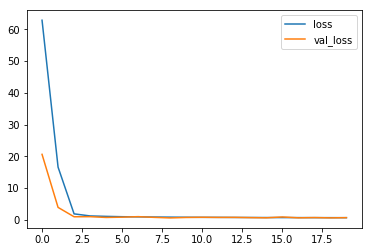

In [57]:
epochs = len(history.history['loss'])
plt.plot(range(epochs), history.history['loss'], label='loss')
plt.plot(range(epochs), history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [58]:
predict_1A_model1 = model.predict(x=test_x,batch_size=100)
#print(len(predicition))
pred_keras_model1 = pd.DataFrame({'id':np.arange(1,len(test_x)+1)})
#pred_keras_model1
pred_keras_model1['predict_1A_model1'] = predict_1A_model1
pred_keras_model1.to_csv('../predict/predict_1A_model1.csv',index=False)
# 4layers :0.22***********************5!
# 5layers :0.21**********************5!  提高有限

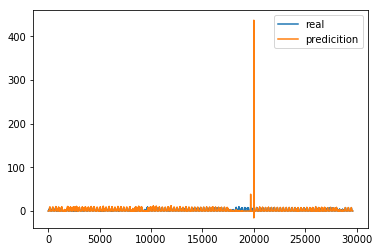

In [59]:
plt.plot(test_y_1A,label='real')
plt.plot(predict_1A_model1,label='predicition')
# plt.plot(y_rr_,label='rr')
# plt.plot(y_lasso_,label='lasso')
plt.legend() 

In [62]:
mse_test=np.sum((test_y_1A - predict_1A_model1)**2)/ len(test_y_1A)
rmse_test=np.sqrt(mse_test)
print("MSE:",mse_test)
print("RMSE:",rmse_test)

MSE: 729029.8570705195
RMSE: 853.8324525751639


1B model1

In [63]:
model = Sequential()
model.add(Dense(units=64, input_shape = (13,),name='layer1'))
model.add(Dense(units=64,name='layer2'))
model.add(Dense(units=16,name='layer3'))
model.add(Dense(units=8,name='layer4'))
model.add(Dense(units=1,name='layer5'))
model.compile(loss='mean_absolute_error',
              optimizer='rmsprop',
              metrics=['mae'])
history = model.fit(x = train_x,y = train_y_1B, validation_data = (eval_x,eval_y_1B), epochs=20, batch_size=1000)

Train on 166376 samples, validate on 41595 samples
Epoch 1/20
166376/166376 [==============================] - 1s - loss: 112.0457 - mean_absolute_error: 112.0457 - val_loss: 79.4414 - val_mean_absolute_error: 79.4414
Epoch 2/20
166376/166376 [==============================] - 1s - loss: 35.0474 - mean_absolute_error: 35.0474 - val_loss: 9.2989 - val_mean_absolute_error: 9.2989
Epoch 3/20
166376/166376 [==============================] - 1s - loss: 7.9062 - mean_absolute_error: 7.9062 - val_loss: 3.9152 - val_mean_absolute_error: 3.9152
Epoch 4/20
166376/166376 [==============================] - 1s - loss: 2.1269 - mean_absolute_error: 2.1269 - val_loss: 1.8559 - val_mean_absolute_error: 1.8559
Epoch 5/20
166376/166376 [==============================] - 1s - loss: 1.6668 - mean_absolute_error: 1.6668 - val_loss: 1.2960 - val_mean_absolute_error: 1.2960
Epoch 6/20
166376/166376 [==============================] - 1s - loss: 1.4894 - mean_absolute_error: 1.4894 - val_loss: 1.1263 - val_mea

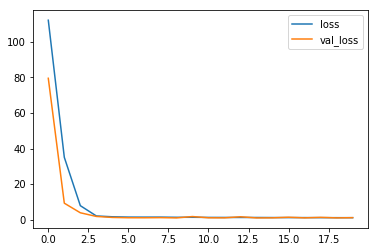

In [65]:
epochs = len(history.history['loss'])
plt.plot(range(epochs), history.history['loss'], label='loss')
plt.plot(range(epochs), history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

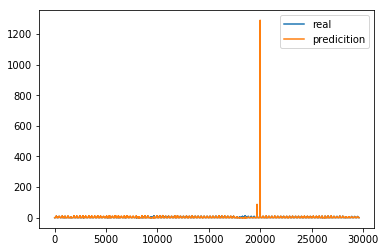

In [66]:
predict_1B_model1 = model.predict(x=test_x,batch_size=100)
#print(len(predicition))
pred_keras_model1 = pd.DataFrame({'id':np.arange(1,len(test_x)+1)})
#pred_keras_model1
pred_keras_model1['predict_1B_model1'] = predict_1B_model1
pred_keras_model1.to_csv('../predict/predict_1B_model1.csv',index=False)

plt.plot(test_y_1B,label='real')
plt.plot(predict_1B_model1,label='predicition')
# plt.plot(y_rr_,label='rr')
# plt.plot(y_lasso_,label='lasso')
plt.legend() 

In [67]:
mse_test=np.sum((test_y_1B - predict_1B_model1)**2)/ len(test_y_1B)
rmse_test=np.sqrt(mse_test)
print("MSE:",mse_test)
print("RMSE:",rmse_test)

MSE: 2821844.643418965
RMSE: 1679.8347071717994


# dense_model2 with activation

In [69]:
model2 = Sequential()
model2.add(Dense(units=64, input_shape = (13,),activation='sigmoid',name='layer1'))
model2.add(Dense(units=32, activation='sigmoid',name='layer2'))
model2.add(Dense(units=16,name='layer3',activation='sigmoid'))
model2.add(Dense(units=8,name='layer4',activation='sigmoid'))
model2.add(Dense(units=4,name='layer5',activation='sigmoid'))
model2.add(Dense(units=1,name='layer6'))
model2.compile(loss='mean_absolute_error',
              optimizer='rmsprop',
              metrics=['mae'])
history=model2.fit(x = train_x,y = train_y_1A, validation_data = (eval_x,eval_y_1A), epochs=50, batch_size=1000)
# 4layer tanh 500epoch val_mean_absolute_error:4.7979
# 4layer sigmoid 500epoch val_mean_absolute_error: 1.9355
# 4layer relu  500epoch Val_mean_absolute_error: 4.9140
# 5layer sigmoid 500epoch val_mean_absolute_error: 1.4085
# 6layer sigmoid 1000epoch val_mean_absolute_error: 3.1005 # 增加了层数和epoch 精度并没有提高？？

Train on 166376 samples, validate on 41595 samples
Epoch 1/50
166376/166376 [==============================] - 1s - loss: 1.9478 - mean_absolute_error: 1.9478 - val_loss: 1.8001 - val_mean_absolute_error: 1.8001
Epoch 2/50
166376/166376 [==============================] - 1s - loss: 1.7212 - mean_absolute_error: 1.7212 - val_loss: 1.5741 - val_mean_absolute_error: 1.5741
Epoch 3/50
166376/166376 [==============================] - 1s - loss: 1.5115 - mean_absolute_error: 1.5115 - val_loss: 1.3871 - val_mean_absolute_error: 1.3871
Epoch 4/50
166376/166376 [==============================] - 1s - loss: 1.3274 - mean_absolute_error: 1.3274 - val_loss: 1.2144 - val_mean_absolute_error: 1.2144
Epoch 5/50
166376/166376 [==============================] - 1s - loss: 1.1591 - mean_absolute_error: 1.1591 - val_loss: 1.0601 - val_mean_absolute_error: 1.0601
Epoch 6/50
166376/166376 [==============================] - 1s - loss: 1.0044 - mean_absolute_error: 1.0044 - val_loss: 0.9138 - val_mean_absolu

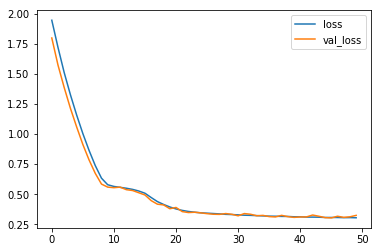

In [70]:
epochs = len(history.history['loss'])
plt.plot(range(epochs), history.history['loss'], label='loss')
plt.plot(range(epochs), history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

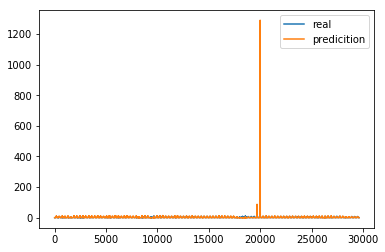

In [76]:
predict_1A_model2 = model.predict(x=test_x,batch_size=100)
#print(len(predicition))
pred_keras_model2 = test_1A
#pred_keras_model1
pred_keras_model2['predict_1A_model2'] = predict_1A_model2
pred_keras_model2.to_csv('../predict/predict_1A_model2.csv',index=False)
# 4layers :0.22***********************5!
# 5layers :0.21**********************5!  提高有限
plt.plot(test_y_1A,label='real')
plt.plot(predict_1A_model2,label='predicition')
# plt.plot(y_rr_,label='rr')
# plt.plot(y_lasso_,label='lasso')
plt.legend() 


In [72]:
mse_test=np.sum((test_y_1A - predict_1A_model2)**2)/ len(test_y_1A)
rmse_test=np.sqrt(mse_test)
print("MSE:",mse_test)
print("RMSE:",rmse_test)

MSE: 2760600.296796408
RMSE: 1661.505430865758


# dense_model3 with activation,bias

In [79]:
model3 = Sequential()
model3.add(Dense(units=64, input_shape = (13,),activation='sigmoid',name='layer1',use_bias = True))
model3.add(Dense(units=32,activation='sigmoid',name='layer2',use_bias = True))
model3.add(Dense(units=16,name='layer3',activation='sigmoid',use_bias = True))
model3.add(Dense(units=8,name='layer4',activation='sigmoid',use_bias = True))
model3.add(Dense(units=1,name='layer5'))
model3.compile(loss='mean_absolute_error',
              optimizer='rmsprop',
              metrics=['mae'])
history=model3.fit(x = train_x,y = train_y_1A, validation_data = (eval_x,eval_y_1A), epochs=50, batch_size=1000)
# val_mean_absolute_error: 1.4931

Train on 166376 samples, validate on 41595 samples
Epoch 1/50
166376/166376 [==============================] - 1s - loss: 2.0733 - mean_absolute_error: 2.0733 - val_loss: 1.8664 - val_mean_absolute_error: 1.8664
Epoch 2/50
166376/166376 [==============================] - 1s - loss: 1.7473 - mean_absolute_error: 1.7473 - val_loss: 1.5311 - val_mean_absolute_error: 1.5311
Epoch 3/50
166376/166376 [==============================] - 1s - loss: 1.4308 - mean_absolute_error: 1.4308 - val_loss: 1.3000 - val_mean_absolute_error: 1.3000
Epoch 4/50
166376/166376 [==============================] - 1s - loss: 1.2437 - mean_absolute_error: 1.2437 - val_loss: 1.1480 - val_mean_absolute_error: 1.1480
Epoch 5/50
166376/166376 [==============================] - 1s - loss: 1.0983 - mean_absolute_error: 1.0983 - val_loss: 1.0070 - val_mean_absolute_error: 1.0070
Epoch 6/50
166376/166376 [==============================] - 1s - loss: 0.9683 - mean_absolute_error: 0.9683 - val_loss: 0.8933 - val_mean_absolu

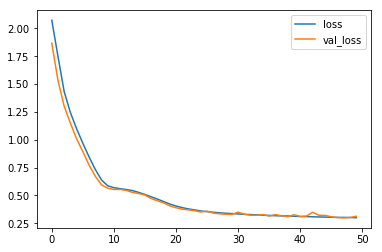

In [80]:
epochs = len(history.history['loss'])
plt.plot(range(epochs), history.history['loss'], label='loss')
plt.plot(range(epochs), history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

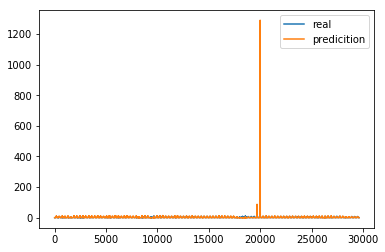

In [81]:
predict_1A_model3 = model.predict(x=test_x,batch_size=100)
#print(len(predicition))
pred_keras_model3 = test_1A
#pred_keras_model1
pred_keras_model3['predict_1A_model3'] = predict_1A_model3
pred_keras_model3.to_csv('../predict/predict_1A_model3.csv',index=False)
# 4layers :0.22***********************5!
# 5layers :0.21**********************5!  提高有限
plt.plot(test_y_1A,label='real')
plt.plot(predict_1A_model3,label='predicition')
# plt.plot(y_rr_,label='rr')
# plt.plot(y_lasso_,label='lasso')
plt.legend() 


In [82]:
mse_test=np.sum((test_y_1A - predict_1A_model3)**2)/ len(test_y_1A)
rmse_test=np.sqrt(mse_test)
print("MSE:",mse_test)
print("RMSE:",rmse_test)

MSE: 2760600.296796408
RMSE: 1661.505430865758
